### 中文分词及数据清洗

In [1]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
class TextCluster(object):
    def __init__(self, file_path, stop_words_path, K):
        self.file_path = file_path
        self.stop_words_path = stop_words_path
        self.K = K
        
    def word_seg(self):
        """
        中文分词和预处理
        """
        stop_words = open(self.stop_words_path, 'r', encoding='utf8') # 读取停用词表格
        stop_words_dict = dict.fromkeys(stop_words.read().split()) # 制作停用词字典
        stop_words.close()
        source = open(self.file_path, 'r', encoding='utf8') # 读取源文件
        self.content = [] # 存放最终内容列表 
        for line in source.read().split(): 
            seglist = jieba.lcut(line) # 中文分词
            temp_txt = [word for word in seglist if word not in stop_words_dict]
            output = ' '.join(temp_txt)
            self.content.append(output)
        else:
            source.close()

    def get_feature(self):
        # 生成词频矩阵
        vectorizer = CountVectorizer() 
        X = vectorizer.fit_transform(self.content)        
        # 计算TF-IDF值
        transformer = TfidfTransformer()  
        tfidf = transformer.fit_transform(X)
        self.weight = tfidf.toarray()
        
    def train(self):
        pca1 = PCA(n_components=2)   #降低成两维绘图 
        self.newData = pca1.fit_transform(self.weight)  
        clf = KMeans(n_clusters=self.K)
        self.y_pred = clf.fit_predict(self.newData)

    def plot_cluster(self):
        pca = PCA(n_components=2)   #降低成两维绘图 
        newData = pca.fit_transform(self.weight)  
        x = [n[0] for n in newData]  
        y = [n[1] for n in newData]
        plt.scatter(x, y, c=self.y_pred, s=100, marker='s')  
        plt.title("Kmeans")    
        plt.xlabel("x")  
        plt.ylabel("y")    
        plt.show()

In [3]:
corpus = TextCluster('test2.txt', 'stop_words.txt', 3)

In [4]:
corpus.word_seg()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\liufu\AppData\Local\Temp\jieba.cache
Loading model cost 0.352 seconds.
Prefix dict has been built successfully.


In [5]:
corpus.get_feature()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.07181152]
 [0.         0.         0.         ... 0.         0.10666227 0.        ]]


In [6]:
corpus.train()

[1 2 2 2 2 1 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2]


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


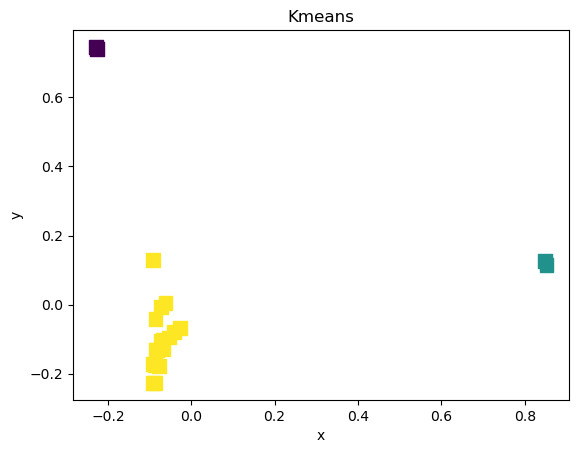

In [7]:
corpus.plot_cluster()

In [8]:
corpus.weight

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07181152],
       [0.        , 0.        , 0.        , ..., 0.        , 0.10666227,
        0.        ]])